Nom:   Ghribi
Prénom:  Achraf 
E-mail:   achraf.ghribi@essai.ucar.tn
Matricule:  1900006
     

# Projet de Programmation Mathématique

Vous devez remettre un rapport individuel au plus tard dimanche le 30 avril 2023 avant 23h59, dans Google Classroom, sous la forme d'un fichier électronique de format IPYNB, nommé ``NomPrenom.ipynb``. Le rapport doit contenir votre nom, prénom, matricule d'étudiant, et email institutionnel. Aucune remise papier ou par courriel ne sera acceptée. La note zéro sera attribuée à toute remise qui ne respecte pas les directives.   

Pour vos analyses, vous devez d'abord obtenir avec votre matricule d'étudiant un ensemble personnalisé de données. Toutes vos réponses doivent correspondre à votre ensemble de données.   

Chacune de vos réponses doit être complète, expliquée et justifiée. Lors de la cor\-rec\-tion, il sera tenu compte de la qualité de la présentation, la pertinence des analyses et l'initiative dont vous ferez preuve dans votre rapport. Sur les 20 points, 18 sont alloués aux analyses, commentaires pertinents, etc. et 2 à la présentation. Les analyses, les tableaux et les graphiques du rapport doivent être produits avec le logiciel ``Python``. Tout cas de plagiat sera sévèrement sanctionné, ainsi qu'une note 0 à ce devoir. 


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np


In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Choix de la donnée
Insérer le matricule pour fixer le dataset.

In [ ]:
matricule = 1900006
 #Insérer le numéro/matricule de la carte d'étudiant
dataframe = data.sample(220, random_state = matricule)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
42534,0.40,Premium,D,VVS2,60.4,59.0,1323,4.77,4.76,2.88
6657,1.13,Premium,J,SI2,59.7,59.0,4093,6.85,6.76,4.06
35486,0.59,Fair,G,I1,64.6,56.0,903,5.26,5.20,3.38
17671,1.32,Very Good,I,VS2,60.5,59.0,7125,7.02,7.06,4.26
23446,1.58,Ideal,I,VVS1,61.9,55.0,11435,7.47,7.51,4.64


# Contribution de l'élève

# Partie 1 
**1)**


In [ ]:
dataframe.describe()


,carat,depth,table,price,x,y,z
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.798091,61.792273,57.503636,3884.340909,5.726182,5.721273,3.666182
std,0.481962,1.335940,2.263687,4076.382880,1.140589,1.128959,2.030381
min,0.230000,57.700000,52.000000,394.000000,3.950000,3.980000,2.440000
25%,0.380000,61.100000,56.000000,896.750000,4.665000,4.640000,2.880000
50%,0.700000,61.900000,57.000000,2332.000000,5.710000,5.700000,3.515000
75%,1.050000,62.500000,59.000000,5107.000000,6.580000,6.542500,4.022500
max,2.520000,66.100000,67.000000,17608.000000,8.680000,8.610000,31.800000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 42534 to 10992
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    220 non-null    float64 
 1   cut      220 non-null    category
 2   color    220 non-null    category
 3   clarity  220 non-null    category
 4   depth    220 non-null    float64 
 5   table    220 non-null    float64 
 6   price    220 non-null    int64   
 7   x        220 non-null    float64 
 8   y        220 non-null    float64 
 9   z        220 non-null    float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 15.3 KB


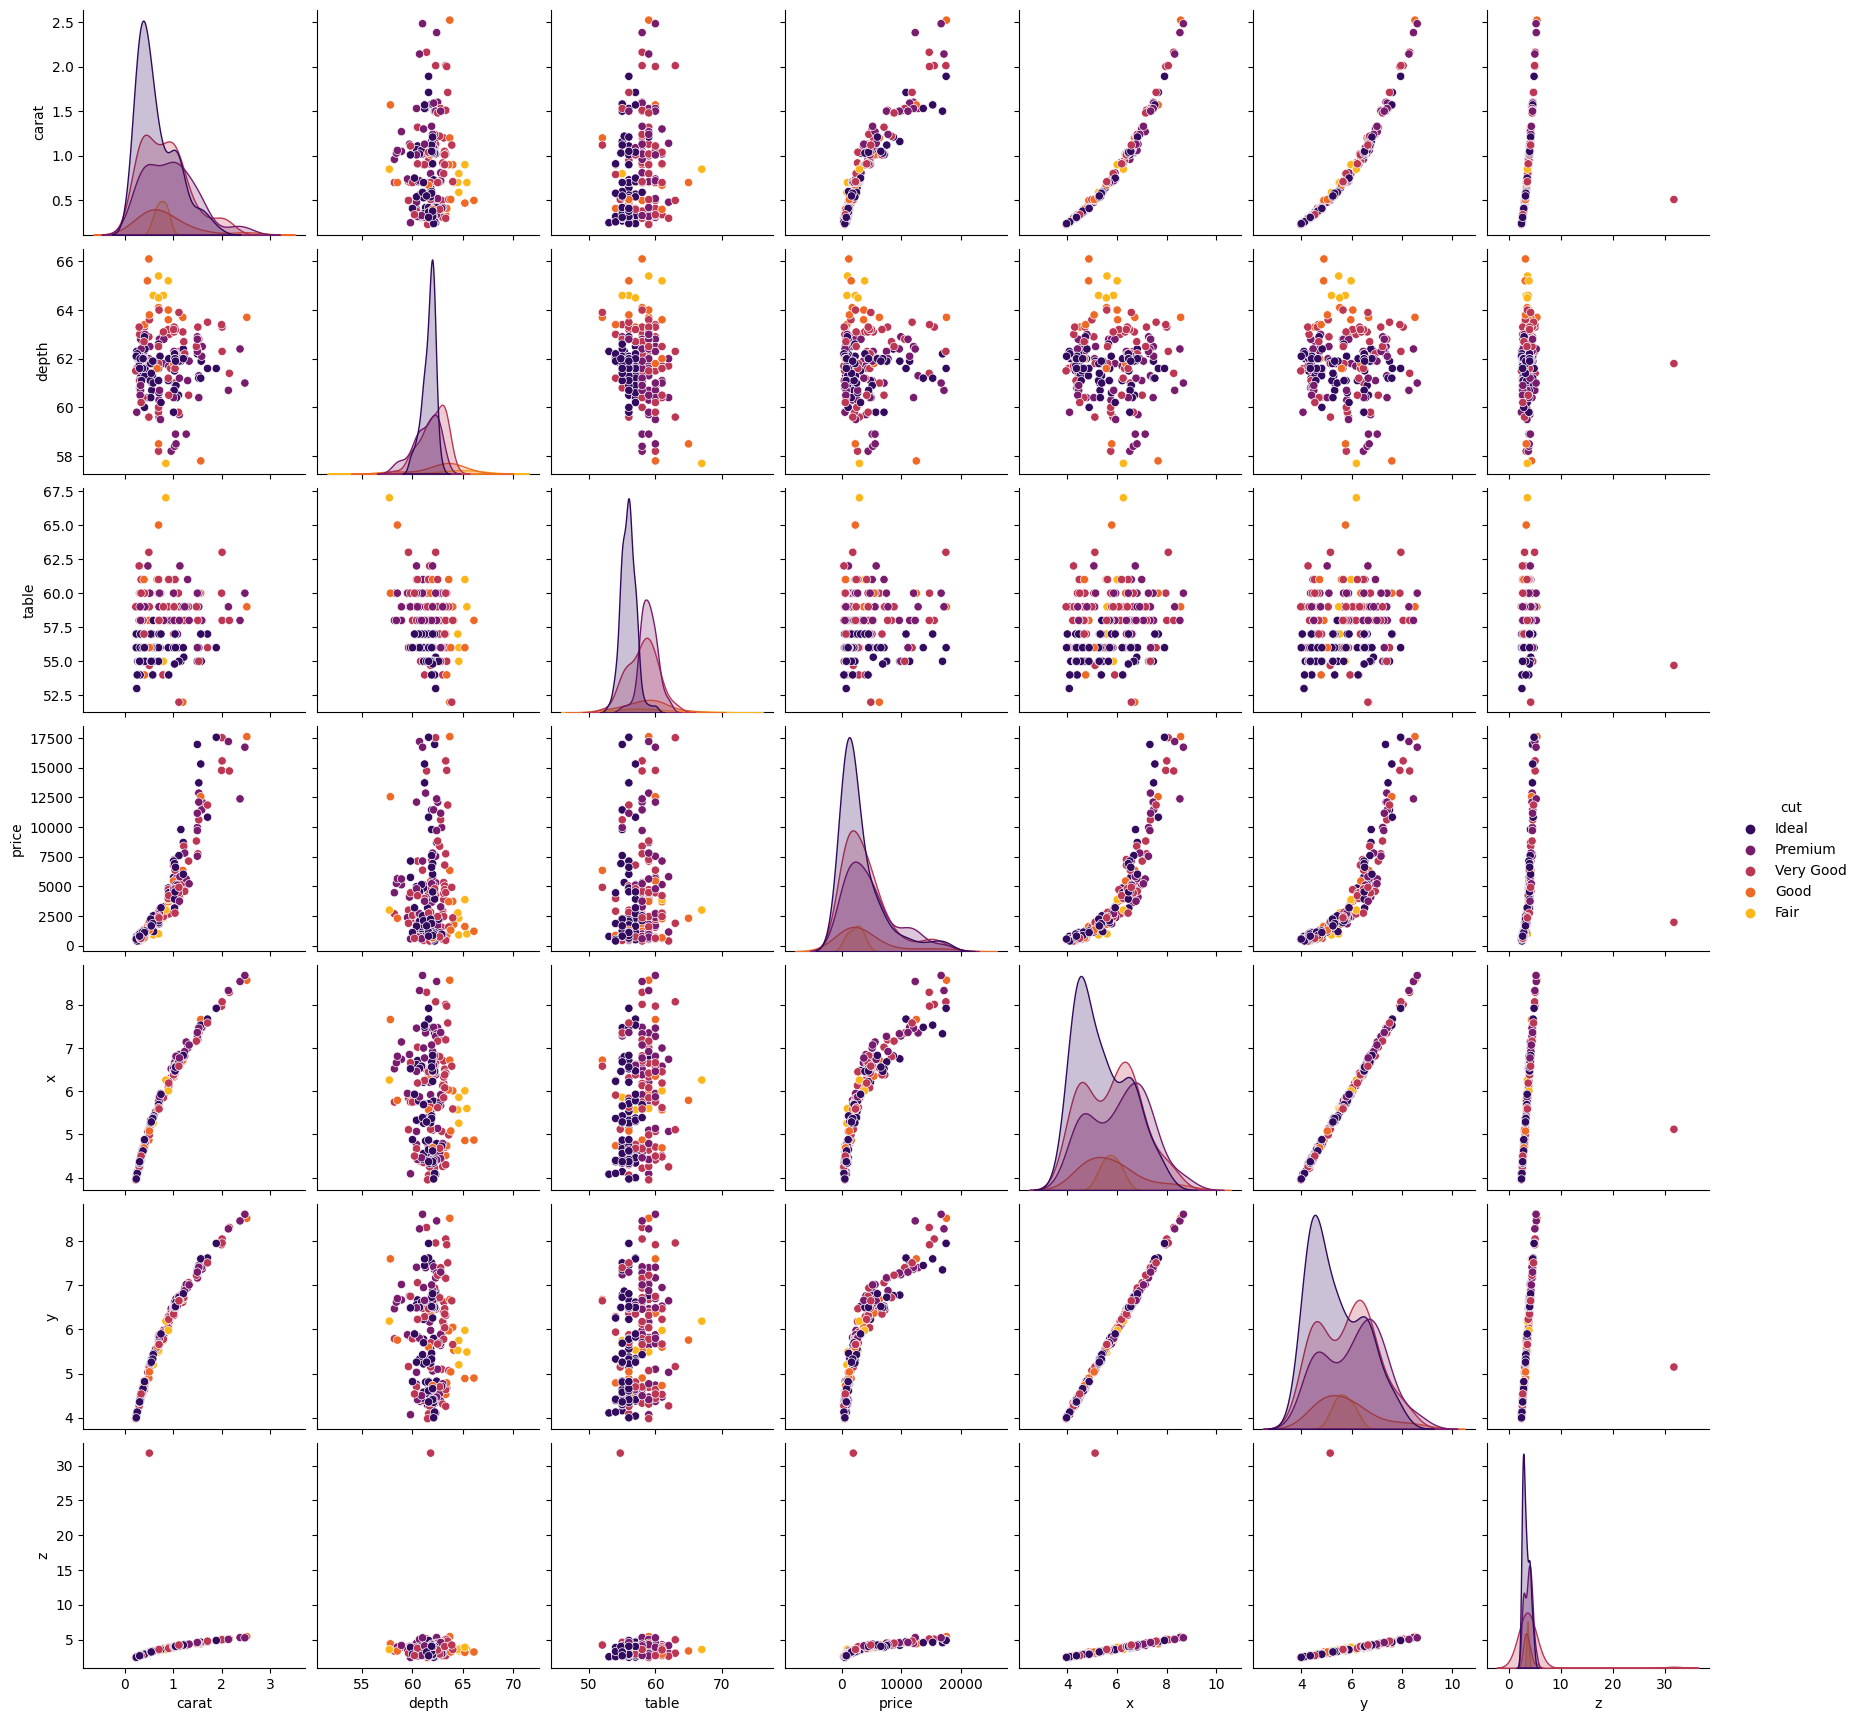

In [ ]:
sns.pairplot(dataframe, hue="cut", palette = 'inferno')

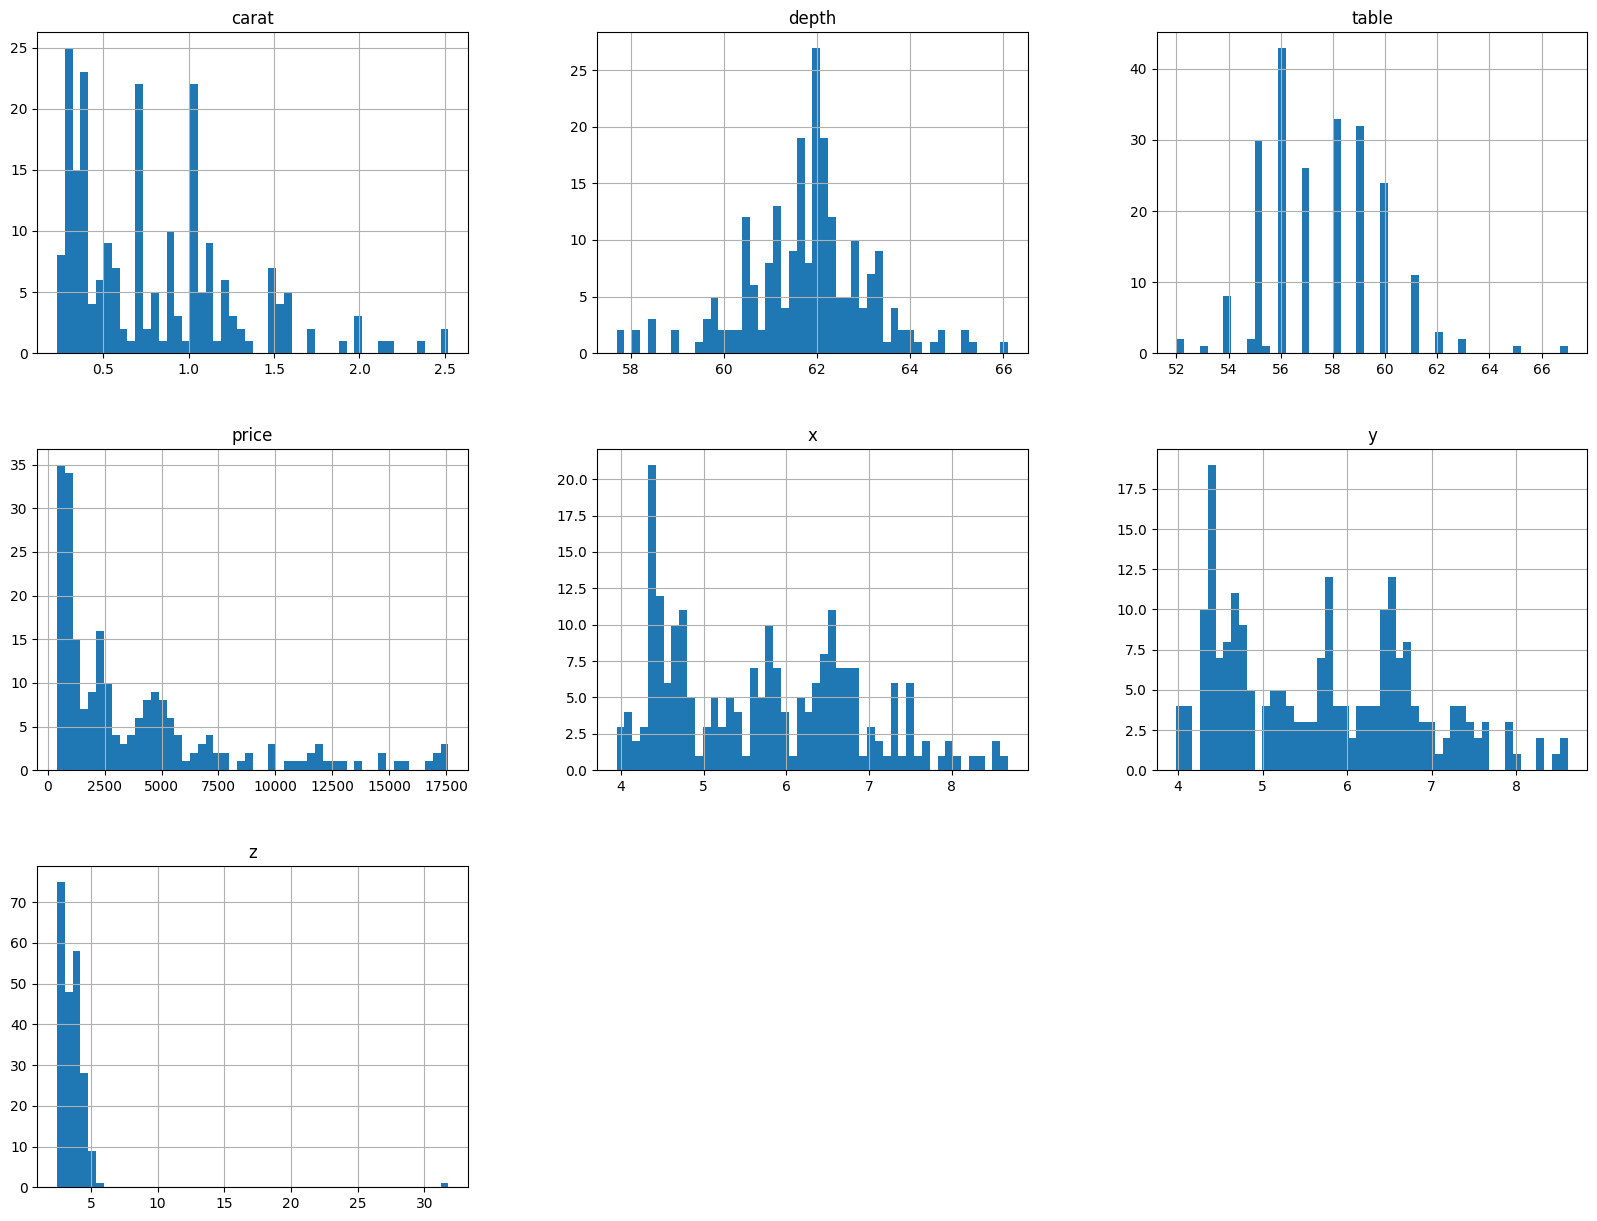

In [ ]:
import matplotlib.pyplot as plt
dataframe.hist(bins=50,figsize=(20,15))
plt.show()


<ipython-input-177-0c3c52c30aef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(),annot = True , cmap = 'Blues' );


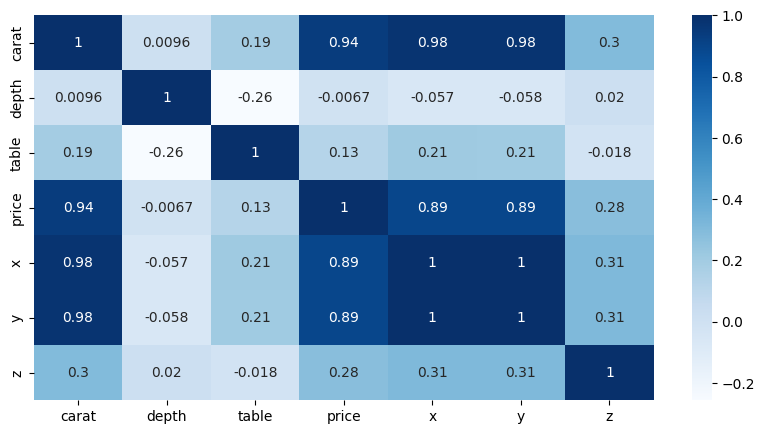

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(dataframe.corr(),annot = True , cmap = 'Blues' );

<ipython-input-178-ae6c5a9f9e11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = dataframe.corr()


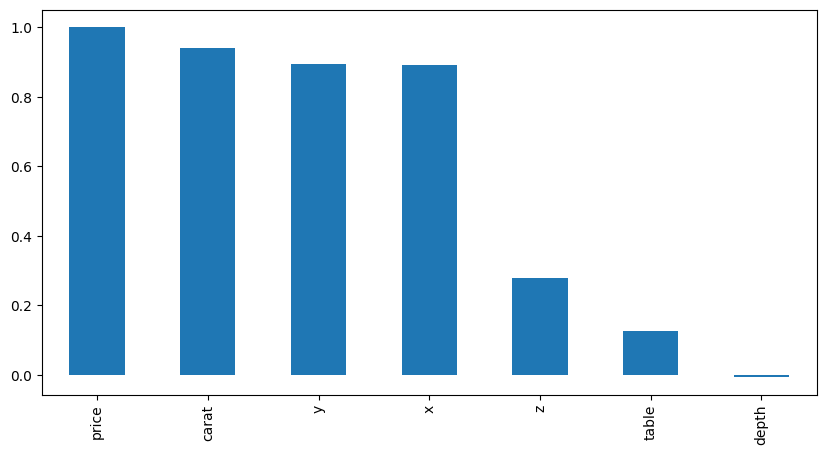

In [ ]:
corr_mat = dataframe.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');


Nous pouvons conclure que les caractéristiques carat, x, y et z ont une forte corrélation avec la variable de prix et que la profondeur (depth) a une relation très faible avec la variable de prix. Par conséquent, nous pouvons supprimer la profondeur de la liste finale des fonctionnalités d'entrée dans le modèle.
Nous créeons une nouvelle feature "area" qui représente l'aire de la surface du diamond en multipliant les valeurs de "x" et "y" ensemble.


Taille de la surface : L'aire peut être considérée comme une mesure de la taille ou de la surface du diamant. Des valeurs plus élevées d'aire pourraient indiquer des diamants plus grands en termes de surface, ce qui pourrait être associé à des prix plus élevés.

Éclat et brillance : Une plus grande surface peut permettre à la lumière de se réfléchir davantage sur le diamant, ce qui peut contribuer à son éclat et à sa brillance. Les diamants avec une plus grande aire pourraient donc être perçus comme plus éclatants et précieux.

Proportions et coupe : L'aire peut également être liée aux proportions et à la qualité de la coupe du diamant. Des proportions bien équilibrées et une coupe de haute qualité peuvent influencer la façon dont la lumière interagit avec le diamant, affectant ainsi son éclat et sa valeur. Une plus grande aire pourrait indiquer une coupe et des proportions favorables.

In [ ]:
dataframe['area'] = dataframe.apply(lambda row: row['x'] * row['y'], axis=1)
dataframe = dataframe.drop(['x', 'y'], axis=1)



In [ ]:
input_cols = ["carat","area"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
data = dataframe.drop(["z","depth","table","cut"], axis=1)
data


,carat,color,clarity,price,area
42534,0.40,D,VVS2,1323,22.7052
6657,1.13,J,SI2,4093,46.3060
35486,0.59,G,I1,903,27.3520
17671,1.32,I,VS2,7125,49.5612
23446,1.58,I,VVS1,11435,56.0997
...,...,...,...,...,...
51156,0.71,F,SI1,2345,31.6394
32701,0.31,F,VS2,802,19.0532
9108,1.04,E,SI1,4530,42.0550
16529,1.05,G,VS2,6604,42.7712


Y = price ,

X1 = carat ,

X2 =  area , 


<ipython-input-183-f9a2100f9ae3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


<Axes: >

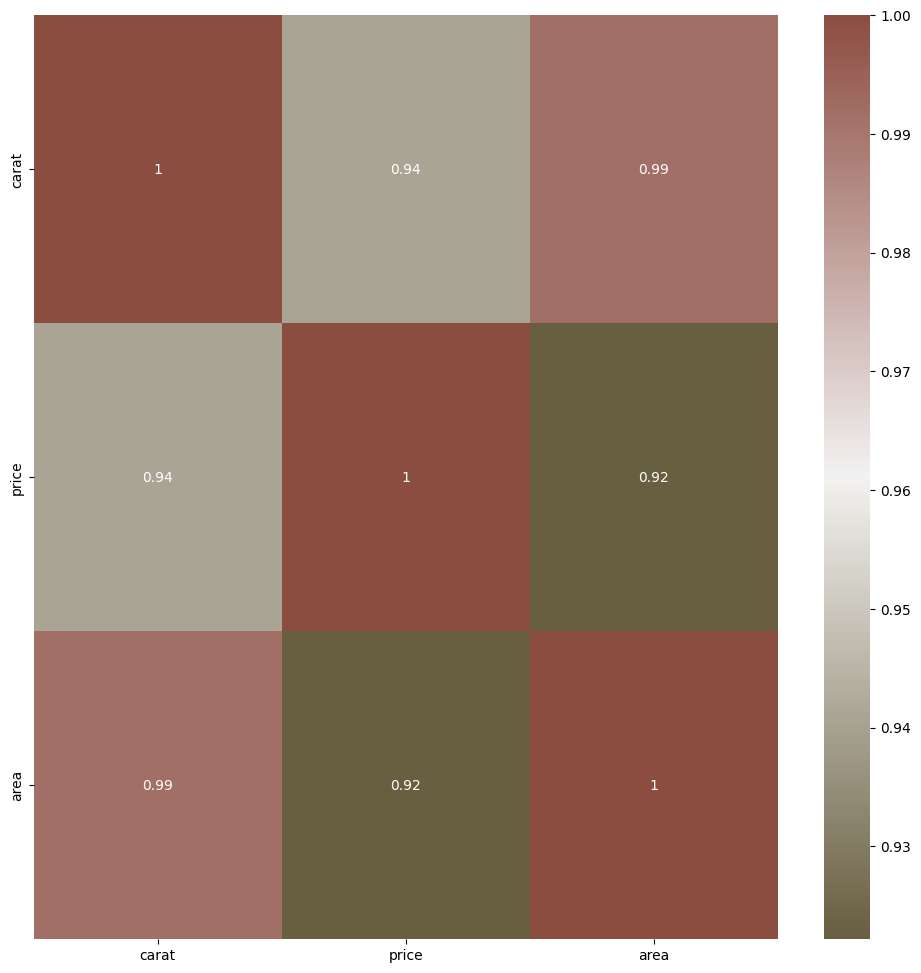

In [ ]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 42534 to 10992
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    220 non-null    float64 
 1   color    220 non-null    category
 2   clarity  220 non-null    category
 3   price    220 non-null    int64   
 4   area     220 non-null    float64 
dtypes: category(2), float64(2), int64(1)
memory usage: 8.0 KB


In [ ]:
data.describe()

,carat,price,area
count,220.000000,220.000000,220.000000
mean,0.798091,3884.340909,34.041599
std,0.481962,4076.382880,13.527678
min,0.230000,394.000000,15.721000
25%,0.380000,896.750000,21.738400
50%,0.700000,2332.000000,32.631700
75%,1.050000,5107.000000,43.033350
max,2.520000,17608.000000,74.734800


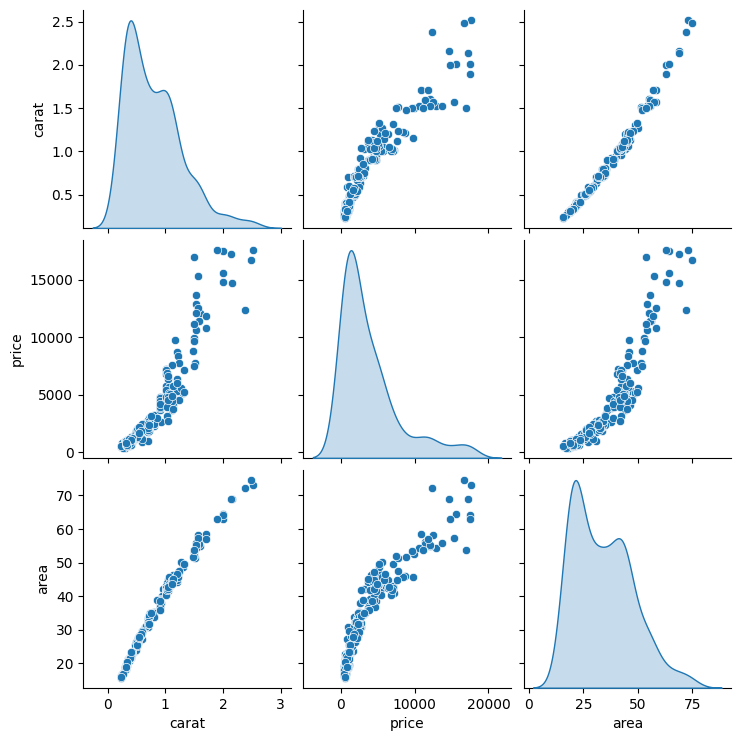

In [ ]:
sns.pairplot(data , diag_kind = 'kde');


In [ ]:
data["price"].describe()


count      220.000000
mean      3884.340909
std       4076.382880
min        394.000000
25%        896.750000
50%       2332.000000
75%       5107.000000
max      17608.000000
Name: price, dtype: float64

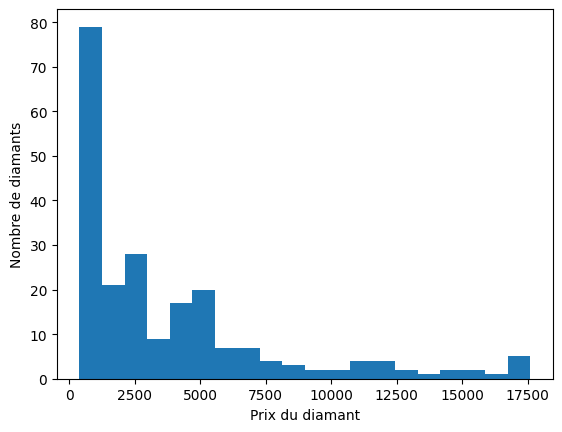

In [ ]:
plt.hist(data['price'], bins=20)
plt.xlabel('Prix du diamant')
plt.ylabel('Nombre de diamants')
plt.show()

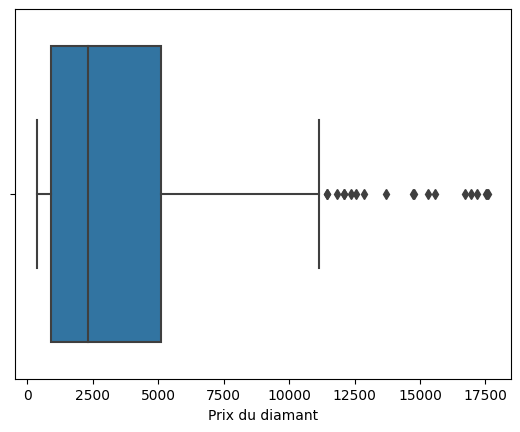

In [ ]:
sns.boxplot(x=data['price'])
plt.xlabel('Prix du diamant')
plt.show()

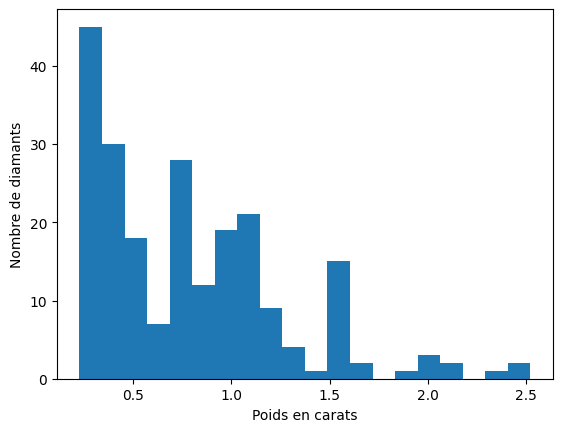

In [ ]:
plt.hist(dataframe['carat'], bins=20)
plt.xlabel('Poids en carats')
plt.ylabel('Nombre de diamants')
plt.show()

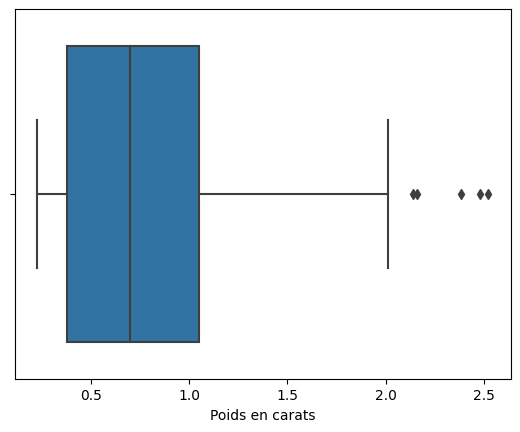

In [ ]:
sns.boxplot(x=dataframe['carat'])
plt.xlabel('Poids en carats')
plt.show()

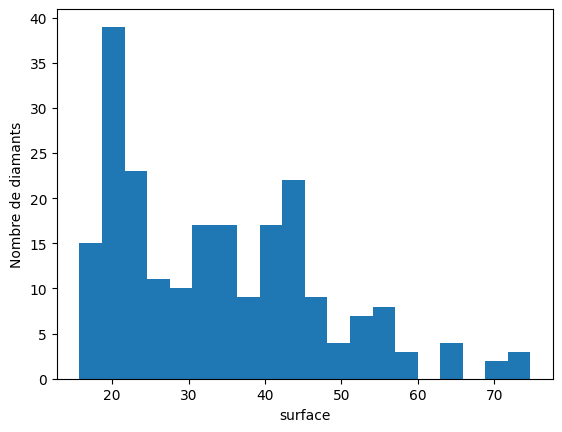

In [ ]:
plt.hist(dataframe['area'], bins=20)
plt.xlabel('surface')
plt.ylabel('Nombre de diamants')
plt.show()

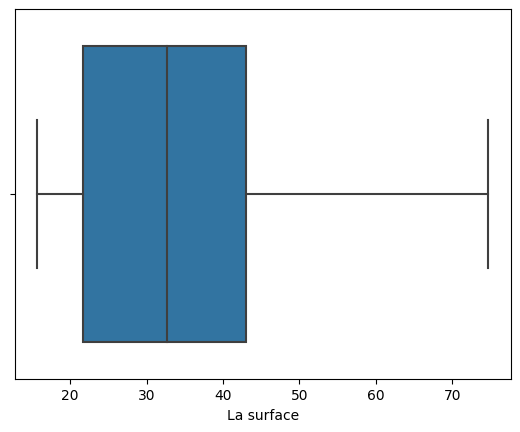

In [ ]:
sns.boxplot(x=dataframe['area'])
plt.xlabel('La surface')
plt.show()

In [ ]:
price_moy = np.mean(data['price'])
price_std = np.std(data['price'], ddof=1)
price_se = price_std / np.sqrt(len(data['price']))
price_confi = 1.96 * price_se

price_Q1 = np.quantile(data['price'], 0.25)
price_Q2 = np.quantile(data['price'], 0.50)
price_Q3 = np.quantile(data['price'], 0.75)

print('Statistiques descriptives pour le prix du diamant :')
print('Moyenne :', round(price_moy, 2))
print('Intervalle de confiance pour la moyenne : [{:.2f}, {:.2f}]'.format(price_moy - price_confi, price_moy + price_confi))
print('Écart type :', round(price_std, 2))
print('Erreur type :', round(price_se, 2))
print('Q1 :', price_Q1)
print('Mediane :', price_Q2)
print('Q3 :', price_Q3)

Statistiques descriptives pour le prix du diamant :
Moyenne : 3884.34
Intervalle de confiance pour la moyenne : [3345.67, 4423.01]
Écart type : 4076.38
Erreur type : 274.83
Q1 : 896.75
Mediane : 2332.0
Q3 : 5107.0


In [ ]:
data["carat"].describe()


count    220.000000
mean       0.798091
std        0.481962
min        0.230000
25%        0.380000
50%        0.700000
75%        1.050000
max        2.520000
Name: carat, dtype: float64

In [ ]:
import scipy.stats
scipy.stats.normaltest(data.price)


NormaltestResult(statistic=75.77912842272018, pvalue=3.505672495434486e-17)

In [ ]:
scipy.stats.normaltest(data.carat)


NormaltestResult(statistic=39.90123588098848, pvalue=2.165492669317692e-09)

In [ ]:
scipy.stats.normaltest(data.area)


NormaltestResult(statistic=15.767544787803645, pvalue=0.00037680890063366185)

# Partie 2

**1)**

Jusqu'à présent, j'ai effectué une exploration très préliminaire des données pour comprendre le
caractéristiques et leur relation par rapport à la variable cible. Et l'objectif principal de ce projet est d'implémenter la régression linéaire dans pytorch, alors arrêtons l'exploration des données et sautons dans le noyeau principal du projet 

Avant de procéder à la construction du modèle, il est bon de convertir les données catégorielles en données numériques .


In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    area_array = dataframe1[['area']].to_numpy()
    carat_array = dataframe1[['carat']].to_numpy()
    return inputs_array, targets_array, carat_array, area_array

inputs_array, targets_array, area_array , carat_array = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[ 0.4   , 22.7052],
        [ 1.13  , 46.306 ],
        [ 0.59  , 27.352 ]]),
 array([[1323],
        [4093],
        [ 903]]))

Y = w1*X1 + w2*X2 + w3



In [ ]:
#Définir des hyperparamètres pour la préparation du jeu de données
val_percent = 0.25
batch_size = 32
torch.manual_seed(99)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
inputs_array_normalized = scaler.fit_transform(inputs_array)
targets_array_normalized = scaler.fit_transform(targets_array)



Maintenant, nous devons créer des ensembles de données et des chargeurs de données PyTorch pour la formation et la validation. La première étape consiste à créer TensorDataset en convertissant les tableaux d'entrée et cible en tenseurs à l'aide de la fonction torch.tensor

In [ ]:
dataset = TensorDataset(torch.tensor(inputs_array_normalized, dtype=torch.float32), torch.tensor(targets_array, dtype=torch.float32))


Ensuite, nous allons diviser l'ensemble de données en ensemble de données de formation (training) et de validation. L'ensemble de formation sera utilisé pour former le modèle et tandis que l'ensemble de validation est utilisé pour évaluer le modèle et il est également utilisé pour ajuster les hyperparamètres (taux d'apprentissage, époques, taille de lot, etc.) pour une meilleure généralisation du modèle formé.


In [ ]:
from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_array_normalized, targets_array_normalized, test_size=val_percent, shuffle=True)

train_data = TensorDataset(torch.tensor(train_inputs), torch.tensor(train_targets))
val_data = TensorDataset(torch.tensor(val_inputs), torch.tensor(val_targets))

train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size*2)

In [ ]:
for xb, yb in train_loader:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([32, 2])
torch.Size([32, 1])


In [ ]:
train_data

In [ ]:
import torch

class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out


Mean Squared Error (MSE) : cette fonction de perte est largement utilisée dans les problèmes de régression. Elle calcule la moyenne des carrés des différences entre les prédictions du modèle et les vraies valeurs.
$\sum y_i - y$



In [ ]:
criterion = nn.MSELoss()


Mean Absolute Error (MAE) : cette fonction de perte calcule la moyenne des valeurs absolues des différences entre les prédictions et les vraies valeurs.


In [ ]:
criterion1 = nn.L1Loss()


Huber Loss : cette fonction de perte combine la MSE et la MAE. Elle est moins sensible aux outliers que la MSE.


In [ ]:
criterion2 = nn.SmoothL1Loss()


In [ ]:
input_dim = 2 # nombre de features en entrée (carat et area)
output_dim = 1 # nombre de features en sortie (prix)
learning_rate = 0.1
num_epochs = 1000

model = LinearRegression(input_dim, output_dim)

# la fonction de perte + l'optimiseur
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    inputs = torch.tensor(train_inputs, dtype=torch.float32)
    targets = torch.tensor(train_targets, dtype=torch.float32)

    # Propagation avant et calcul de la perte // forward
    outputs = model(inputs)
    mse = criterion(outputs, targets)

    # Propagation arrière et mise à jour des poids // backword
    optimizer.zero_grad()
    mse.backward()
    optimizer.step()

    with torch.no_grad():
        val_inputs = torch.tensor(val_inputs, dtype=torch.float32)
        val_targets = torch.tensor(val_targets, dtype=torch.float32)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_targets)

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Perte: {:.4f}'.format(epoch+1, num_epochs, mse.item()))

<ipython-input-253-675817b03907>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(train_inputs, dtype=torch.float32)
<ipython-input-253-675817b03907>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(train_targets, dtype=torch.float32)
<ipython-input-253-675817b03907>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_inputs = torch.tensor(val_inputs, dtype=torch.float32)
<ipython-input-253-675817b03907>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

Epoch [100/1000], Perte: 0.1275
Epoch [200/1000], Perte: 0.1263
Epoch [300/1000], Perte: 0.1255
Epoch [400/1000], Perte: 0.1249
Epoch [500/1000], Perte: 0.1245
Epoch [600/1000], Perte: 0.1242
Epoch [700/1000], Perte: 0.1240
Epoch [800/1000], Perte: 0.1238
Epoch [900/1000], Perte: 0.1237
Epoch [1000/1000], Perte: 0.1236


Les valeurs de perte indiquées pour chaque époque représentent l'écart moyen entre les prédictions de votre modèle et les valeurs réelles de la variable cible (dans ce cas, le prix). Les valeurs de perte commencent à un niveau élevé (0.12) et diminuent progressivement à chaque époque. À la fin de l'entraînement (époque 1000), la perte moyenne est réduite à 0.10, ce qui suggère que notre modèle est capable de prédire le prix avec une précision relativement élevée.

# **2)**
 On considére le second modèle qui est un perceptron multi-couches :

$Y(w) = \sigma(w_1.X_1 + w_2.X_2 + w_3)$

ou w1, w2, w3 sont des paramétres et segma est la fonction sigmoid.
On prend comme fonction perte, la fonction MSE(w)

In [ ]:
class perceptron(torch.nn.Module):
    def __init__(self):
        super(perceptron, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

In [ ]:
def sigmoid(z):
    """Fonction sigmoid"""
    return 1 / (1 + np.exp(-z))

def mse_loss(theta, X, y):
    """Fonction de perte MSE"""
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X, theta))
    loss = np.sum((y_pred - y)**2) / (2 * m)
    return loss

def mse_grad(theta, X, y):
    """Gradient de la fonction de perte MSE"""
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, (y_pred - y) * y_pred * (1 - y_pred)) / m
    return grad

In [ ]:
theta = np.random.randn(inputs_array_normalized.shape[1]) 

gradient = mse_grad(theta, inputs_array_normalized, targets_array_normalized)
print(gradient)

[[-0.22704237 -0.23133207 -0.23326486 -0.22211298 -0.20542176 -0.22399562
  -0.22637705 -0.22518792 -0.2351876  -0.22948817 -0.23405044 -0.23469308
  -0.23220103 -0.22297399 -0.23041053 -0.22451538 -0.23296191 -0.22433461
  -0.22420821 -0.23363114 -0.23094441 -0.22774971 -0.23037686 -0.22389219
  -0.23515836 -0.23477799 -0.23479153 -0.16479063 -0.23476915 -0.22664459
  -0.22527151 -0.22571781 -0.23369556 -0.23478014 -0.23414342 -0.1119736
  -0.23025836 -0.23512688 -0.23384465 -0.226296   -0.2346987  -0.22390881
  -0.22204537 -0.16370233 -0.23425077 -0.23342584 -0.23482831 -0.2238221
  -0.23450959 -0.22418877 -0.23479479 -0.23013408 -0.22958195 -0.20922759
  -0.23050438 -0.22273863 -0.23386842 -0.23444217 -0.20840435 -0.22684006
  -0.20158943 -0.20952349 -0.23160822 -0.2258944  -0.23450411 -0.23431858
  -0.23314285 -0.22816682 -0.22187282 -0.23450712 -0.23467224 -0.21083712
  -0.2268734  -0.2344868  -0.15220375 -0.22510636 -0.23166565 -0.22647191
  -0.22438771 -0.23111215 -0.23407003 -0

# **3)a)**
w(n+1) = w(n) - eta*gradients(MSE(w(n))


In [ ]:
def MSE(X, Y, w):
    X = X.double()  # Ensure X is of type Double
    pred = torch.matmul(X, w)
    errors = pred - Y.double()
    cost = torch.sum(errors ** 2) / (2 * len(X))
    gradients = torch.matmul(torch.transpose(X, 0, 1), errors) / len(X)
    return cost, gradients

In [ ]:
def gradient_descent(X, Y, eta, num_iterations):
  w = torch.randn(X.shape[1], 1, dtype=torch.double)
  costs = []
  for i in range(num_iterations):
    cost, gradients = MSE(X,Y,w)
    w -= eta*gradients
    costs.append(cost.item())
  return w, costs

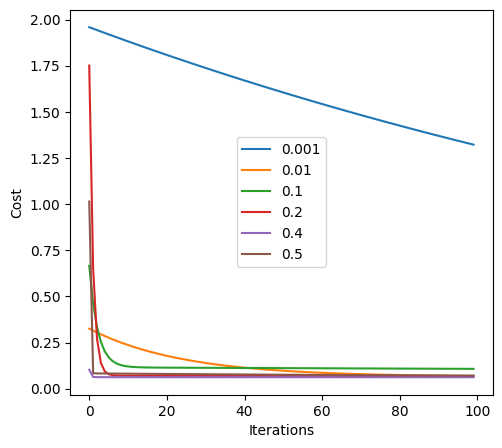

In [ ]:
etas = [0.001, 0.01, 0.1, 0.2, 0.4, 0.5]
train_inputs = torch.tensor(train_inputs, dtype=torch.double)
train_targets = torch.tensor(train_targets, dtype=torch.double)
iter = 100
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
for i in etas:
  weights, costs = gradient_descent(train_inputs, train_targets, i , iter)
  plt.plot(costs, label=str(i))
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.legend()
plt.show()

## **b)**

In [ ]:
def optimal_step_descent(X, y, num_iterations):
    X = X.double() 
    y = y.double()  
    w = torch.randn(X.shape[1], 1, dtype=torch.double)  
    costs = []
    for i in range(num_iterations):
        alpha = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(X, 0, 1), X)), torch.transpose(X, 0, 1)), y)
        cost, gradients = MSE(X, y, w)
        w -= alpha * gradients
        costs.append(cost)
    return w, costs

<ipython-input-244-0c8cb1ec386b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs).double()
<ipython-input-244-0c8cb1ec386b>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_targets = torch.tensor(train_targets).double()


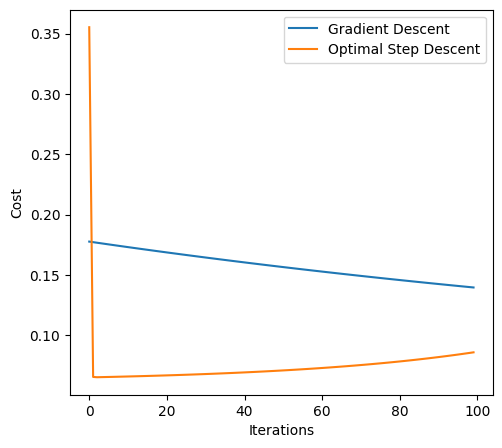

In [ ]:
eta = 0.1  
iterations= 100

train_inputs = torch.tensor(train_inputs).double()
train_targets = torch.tensor(train_targets).double()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)

#gradient_des
weights_gd, costs_gd = gradient_descent(train_inputs, train_targets, etas[0], iterations)
plt.plot(costs_gd, label="Gradient Descent")

#optimal_step_des
weights_opt, costs_opt = optimal_step_descent(train_inputs, train_targets, iterations)
plt.plot(costs_opt, label="Optimal Step Descent")

ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.legend()
plt.show()

## **c)**

In [ ]:
def stochastic_gradient_descent(X,y,eta,iter):
  w = torch.randn(X.shape[1], 1, dtype=torch.double)  
  costs = []
  for i in range(num_iterations):
    cost_total = 0
    for i in range(len(X)):
      rand_index = np.random.randint(len(X))
      X_i= X[rand_index].unsqueeze(0)
      y_i = y[rand_index].unsqueeze(0)
      cost, gradients = MSE(X_i,y_i,w)
      w -= learning_rate*gradients
      cost_total += cost
    costs.append(cost_total / len(X))
  return w, costs

<ipython-input-246-98aab5aa131b>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs).double()
<ipython-input-246-98aab5aa131b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_targets = torch.tensor(train_targets).double()


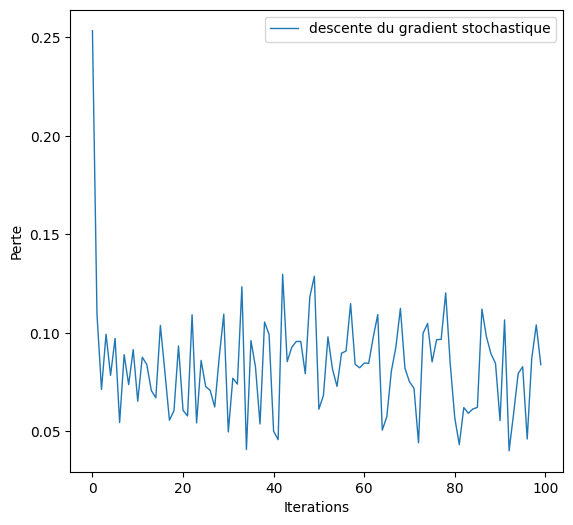

In [ ]:
train_inputs = torch.tensor(train_inputs).double()
train_targets = torch.tensor(train_targets).double()
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
weights2, costs2 = stochastic_gradient_descent(train_inputs,train_targets , 0.1, 20)
plt.plot(costs2, lw=1, label="descente du gradient stochastique")
ax.set_xlabel("Iterations")
ax.set_ylabel("Perte")
plt.legend()
plt.show()

In [ ]:
etas = [0.1]  # Select the desired learning rate(s)
num_iterations = 100

# Convert inputs and targets to tensors
train_inputs = torch.tensor(train_inputs).double()
train_targets = torch.tensor(train_targets).double()

# GD
weights_gd, costs_gd = gradient_descent(train_inputs, train_targets, etas[0], num_iterations)
mse_gd, _ = MSE(train_inputs, train_targets, weights_gd)

# OSD
weights_opt, costs_opt = optimal_step_descent(train_inputs, train_targets, num_iterations)
mse_opt, _ = MSE(train_inputs, train_targets, weights_opt)

# SGD
weights_sgd, costs_sgd = stochastic_gradient_descent(train_inputs, train_targets, etas[0], num_iterations)
mse_sgd, _ = MSE(train_inputs, train_targets, weights_sgd)

print("MSE pour Gradient Descent:", mse_gd.item())
print("MSE pour Optimal Step Descent:", mse_opt.item())
print("MSE pour Stochastic Gradient Descent:", mse_sgd.item())

<ipython-input-251-3f3c4f5c1619>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs).double()
<ipython-input-251-3f3c4f5c1619>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_targets = torch.tensor(train_targets).double()


MSE pour Gradient Descent: 0.0631108551556141
MSE pour Optimal Step Descent: 0.10106435082558986
MSE pour Stochastic Gradient Descent: 0.062007960850056075


*En conclusion, sur la base des valeurs de MSE, l'approche de descente de gradient stochastique a donné la plus faible différence quadratique moyenne, ce qui indique une meilleure précision du modèle par rapport aux deux autres approches.*

** Bonus **

In [ ]:
def batch_gradient_descent(X, y, m, learning_rate=0.1, iterations=100):
    thetas = torch.randn(X.shape[1], 1, dtype=torch.double)
    thetas_path = [thetas]
    for i in range(iterations):
        gradients = 2 * torch.matmul(X.T, torch.matmul(X, thetas) - y) / m
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

    return thetas_path

In [ ]:
weights_bgd = batch_gradient_descent(train_inputs, train_targets, len(train_inputs), learning_rate, iterations)
mse_bgd, _ = MSE(train_inputs, train_targets, weights_bgd[-1])

In [ ]:
print("MSE pour Batch Gradient Descent:", mse_bgd.item())


MSE pour Batch Gradient Descent: 0.06324563422164235
